## CNN 모델 학습과정 시각화

사용할 모델

In [4]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Dropout, Flatten
from keras import optimizers
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28,28,1).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

In [80]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(256,kernel_size=(3,3),
                 activation="relu",
                 kernel_initializer='random_uniform',
                 bias_initializer='zeros',
                 input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [5]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 8s 431us/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 0.0961 - val_accuracy: 0.9708
Epoch 2/5
18000/18000 [==============================] - 7s 374us/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0861 - val_accuracy: 0.9747
Epoch 3/5
18000/18000 [==============================] - 7s 378us/step - loss: 0.0257 - accuracy: 0.9924 - val_loss: 0.0902 - val_accuracy: 0.9739
Epoch 4/5
18000/18000 [==============================] - 7s 384us/step - loss: 0.0188 - accuracy: 0.9952 - val_loss: 0.0929 - val_accuracy: 0.9737
Epoch 5/5
10000/10000 [==============================] - 1s 77us/step

loss_and_metrics : [0.07182289693440544, 0.9771999716758728]
True : 0, Predict : 0
True : 4, Predict : 4
True : 6, Predict : 6
True : 3, Predict : 3
True : 7, Predict : 7


## 개별 데이터 분류결과 시각화
---

분류가 못 된 이미지들을 골라내 어떤 문제가 있는지 확인한다

In [ ]:
#테스트 데이터 대상 모델의 loss와 정확도부터 체크한다
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

In [13]:
#predict() 메소드를 이용해 prediction을 생성한 후, 진짜 label과 비교한다
y_pred = model.predict(x_test, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

10000/10000 [==============================] - 1s 77us/step

loss_and_metrics : [0.07182289693440544, 0.9771999716758728]


In [60]:
 class_names = ['0', '1', '2', '3', '4',
               '5','6','7','8','9']

In [61]:
import matplotlib.pyplot as plt

#이미지와 pred결과를 보여주고, 실제 label도 보여준다
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 3,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


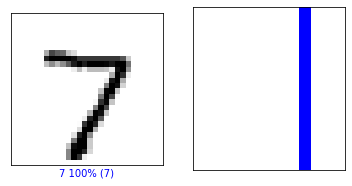

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,y_pred, y_test, x_test.reshape((x_test.shape[0],28,28)))
plt.subplot(1,2,2)
plot_value_array(i, y_pred, y_test)
plt.show()

In [74]:
import pandas as pd

#전체 결과 중에서 분류가 잘 안된 것들의 index만 골라줌
def check_incorrect_image(predictiones_array, true_label) :
    predicted_labels = list(map(np.argmax,predictiones_array))
    true_labels = list(map(np.argmax,true_label))
    
    labels = {'predicted':predicted_labels, 'true':true_labels}
    df = pd.DataFrame(labels)
    
    return df[df['predicted'] != df['true']]

In [77]:
incorrected = check_incorrect_image(y_pred,y_test)
incorrected

,predicted,true
151,3,9
217,5,6
247,2,4
259,0,6
321,7,2
...,...,...
9782,5,6
9793,5,6
9811,3,2
9839,7,2


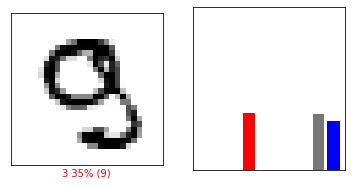

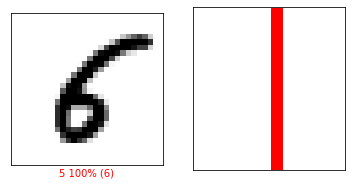

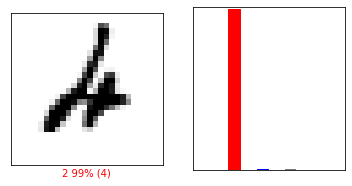

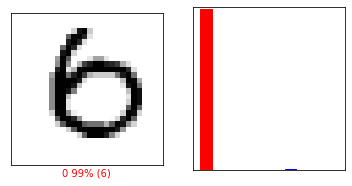

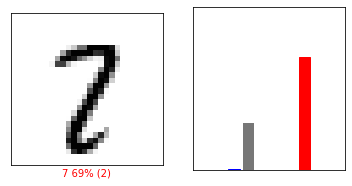

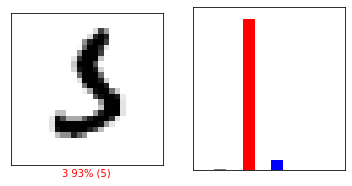

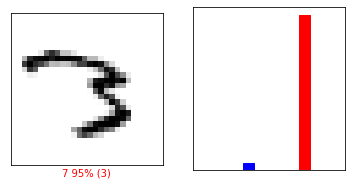

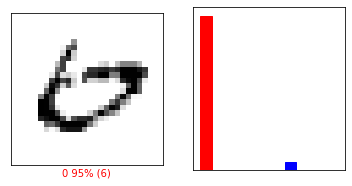

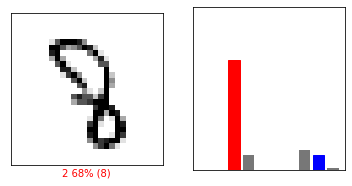

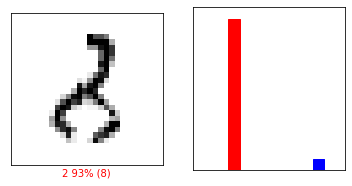

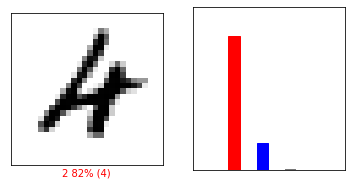

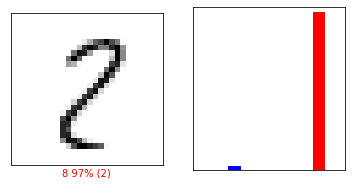

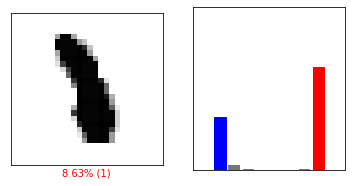

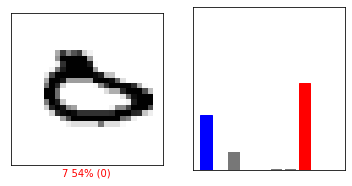

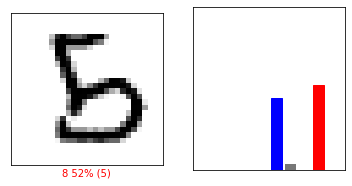

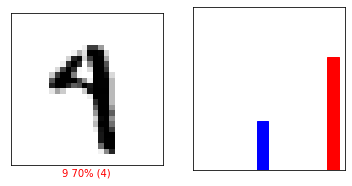

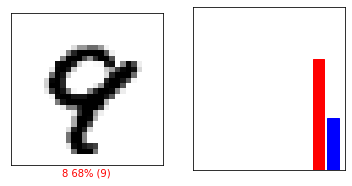

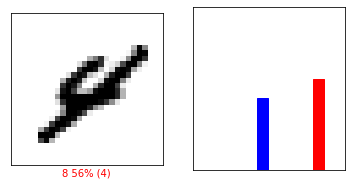

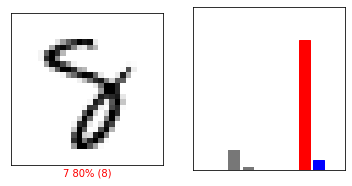

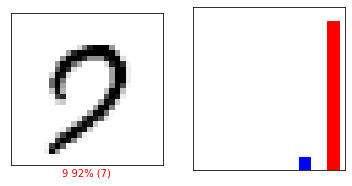

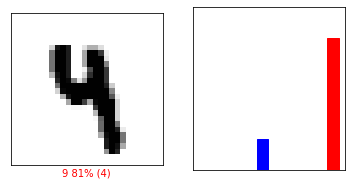

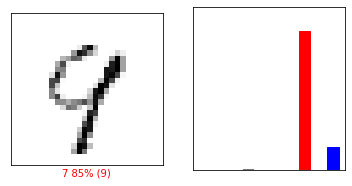

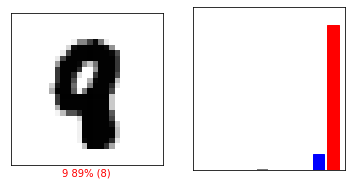

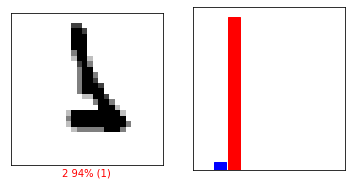

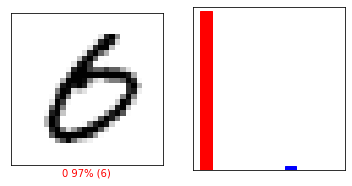

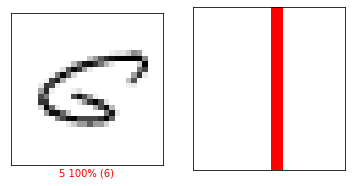

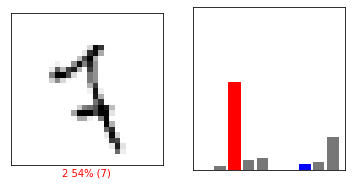

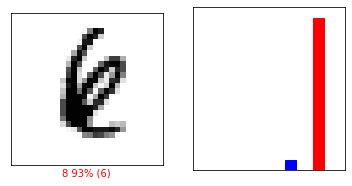

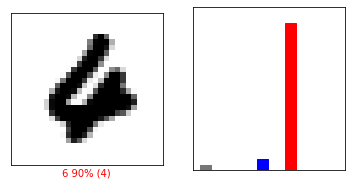

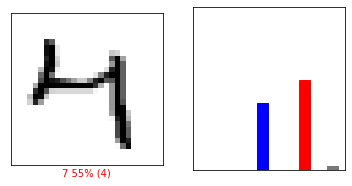

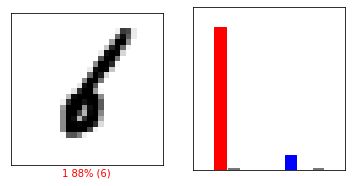

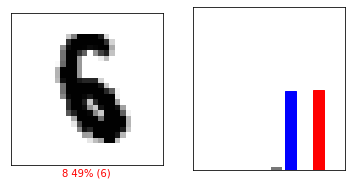

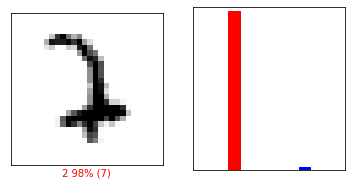

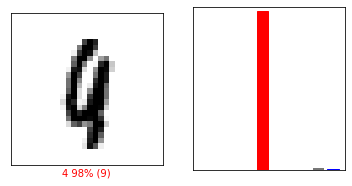

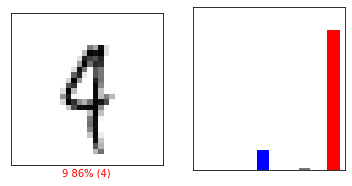

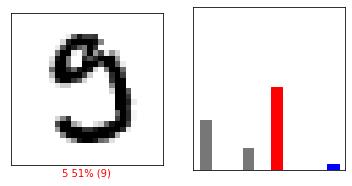

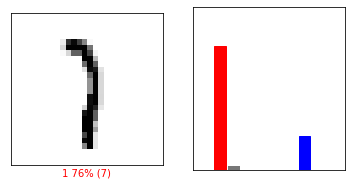

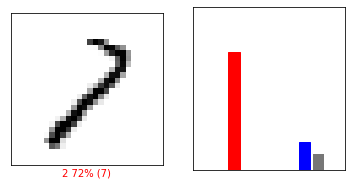

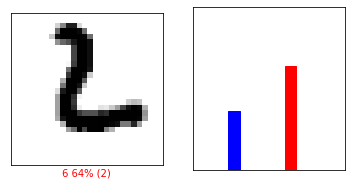

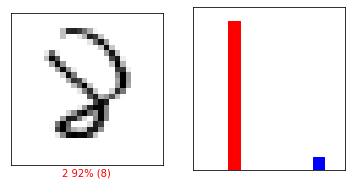

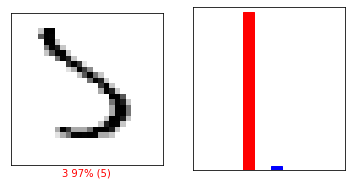

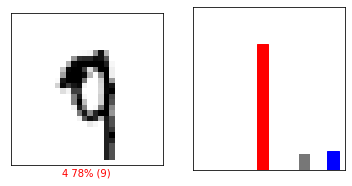

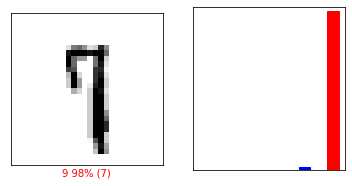

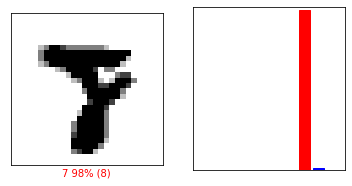

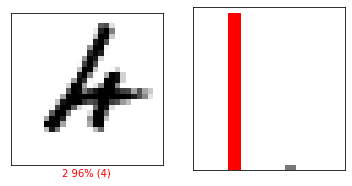

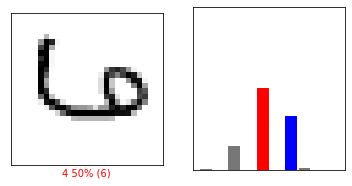

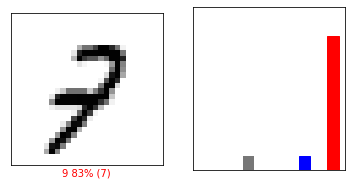

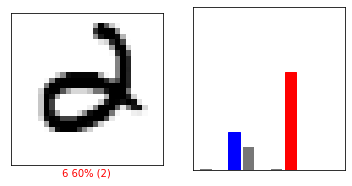

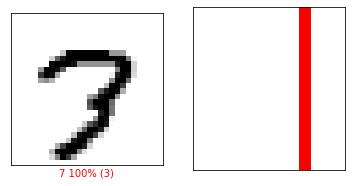

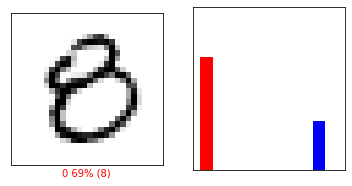

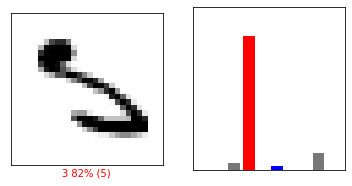

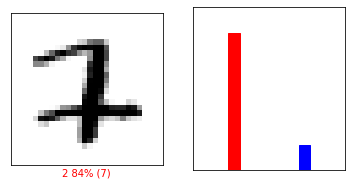

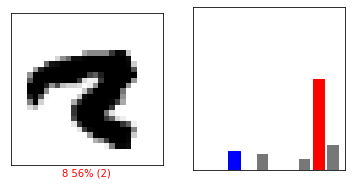

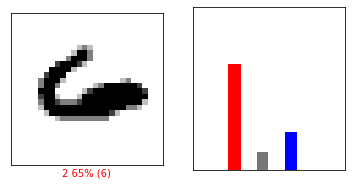

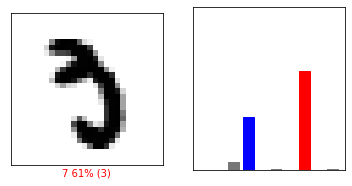

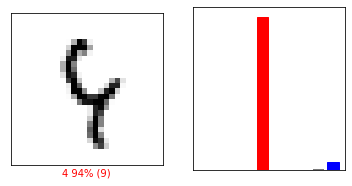

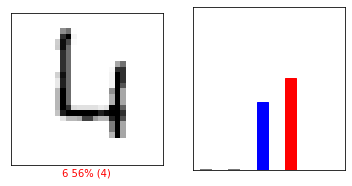

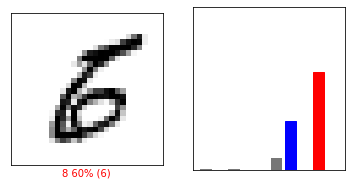

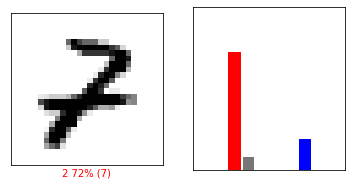

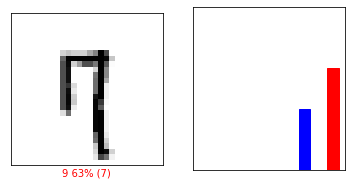

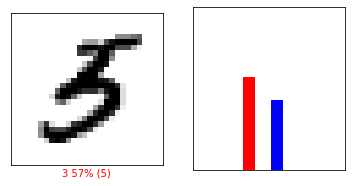

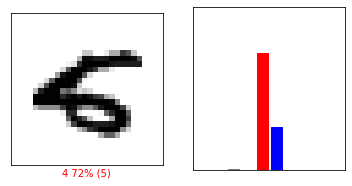

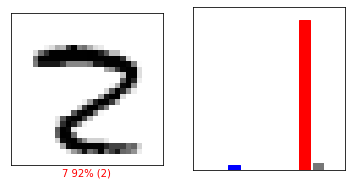

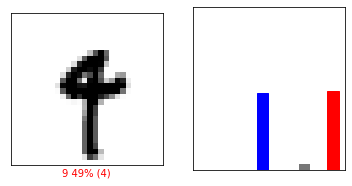

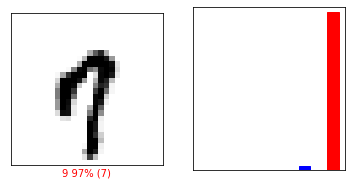

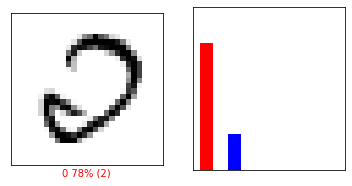

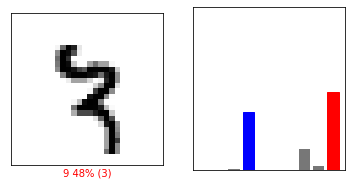

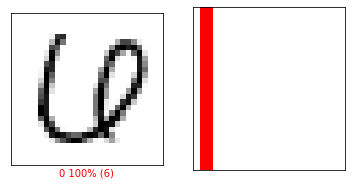

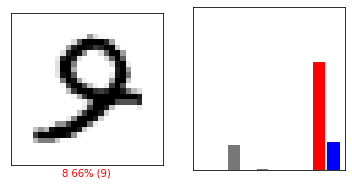

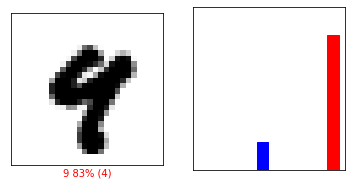

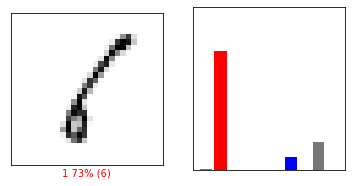

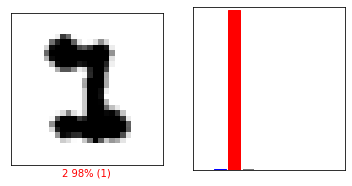

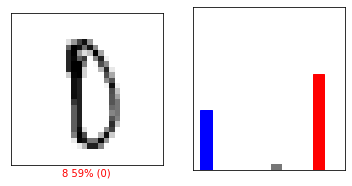

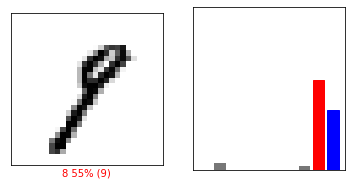

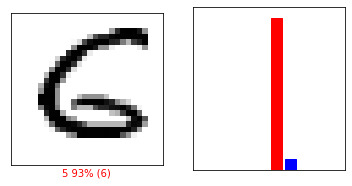

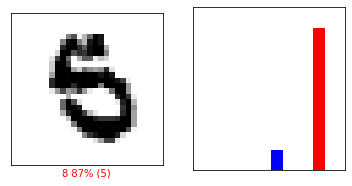

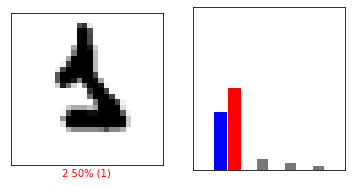

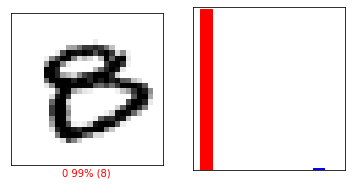

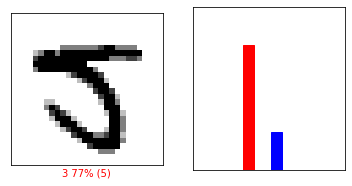

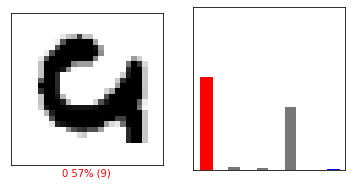

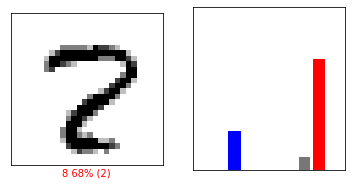

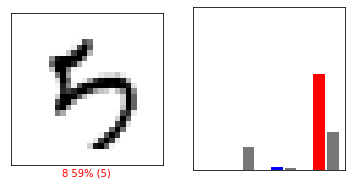

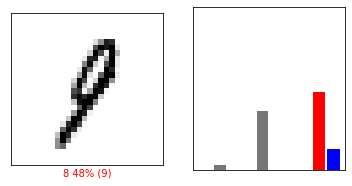

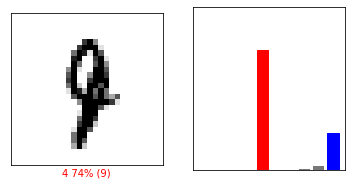

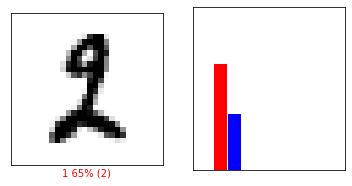

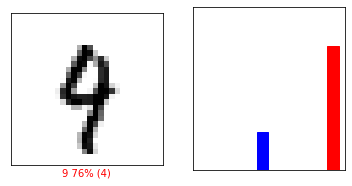

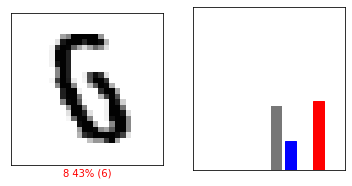

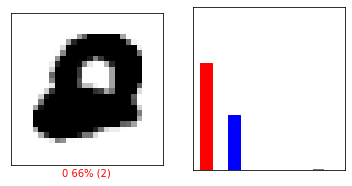

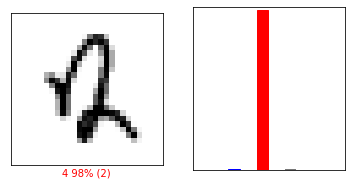

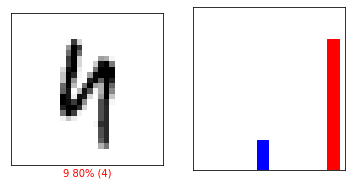

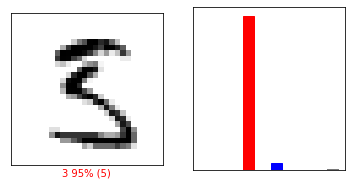

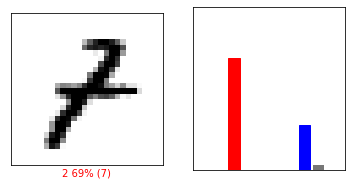

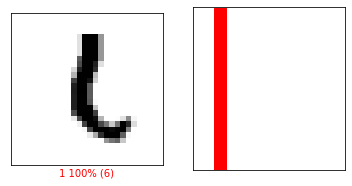

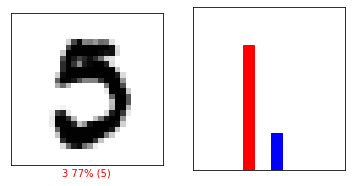

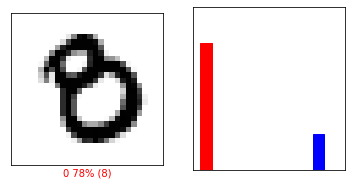

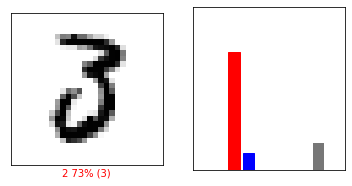

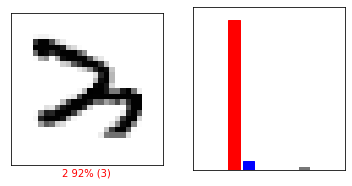

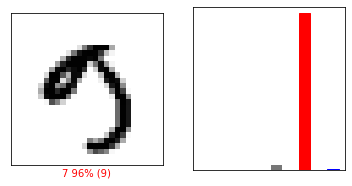

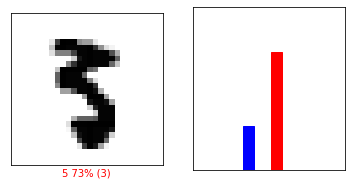

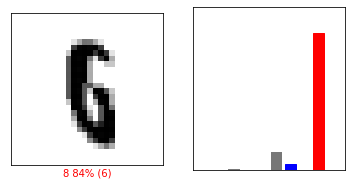

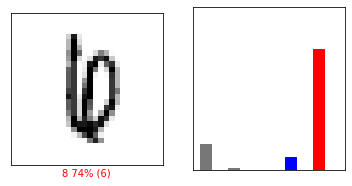

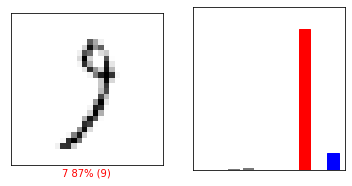

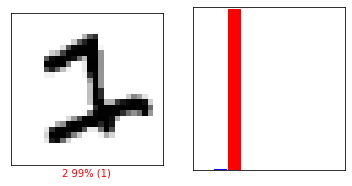

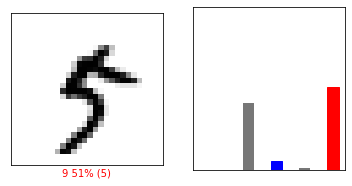

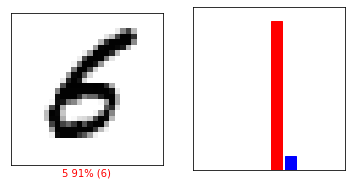

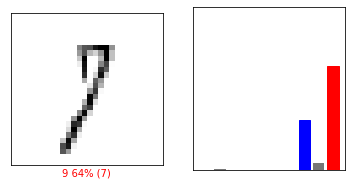

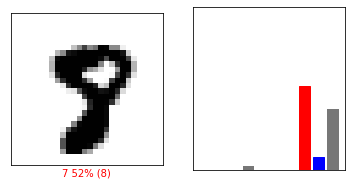

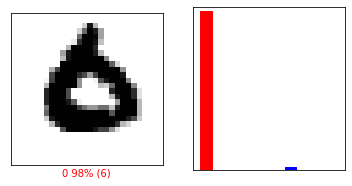

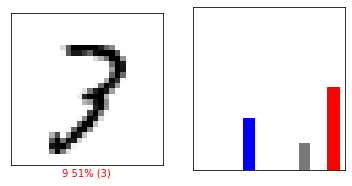

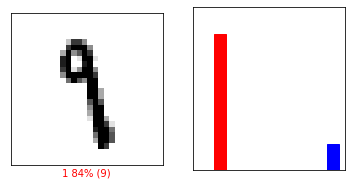

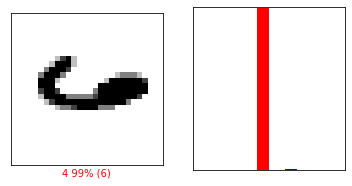

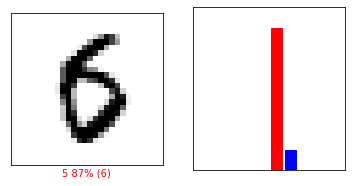

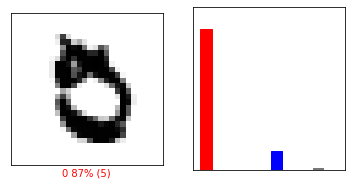

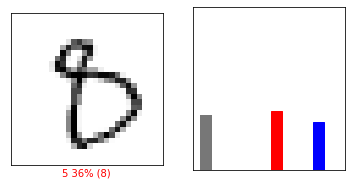

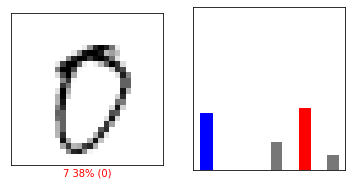

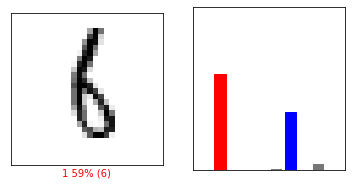

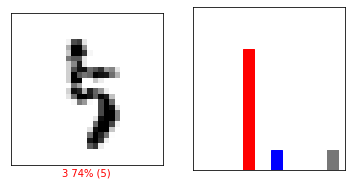

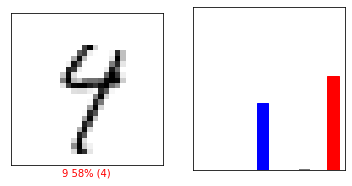

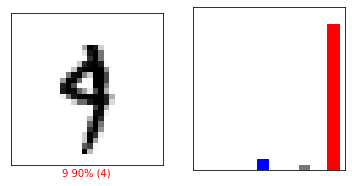

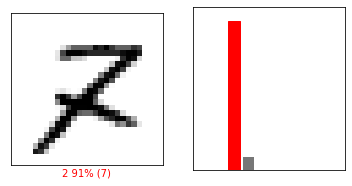

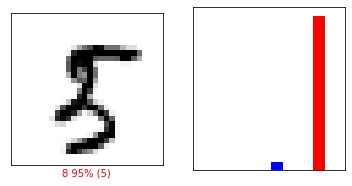

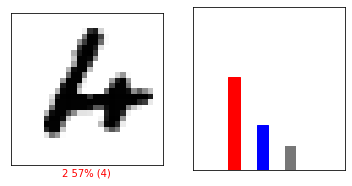

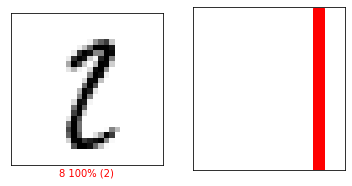

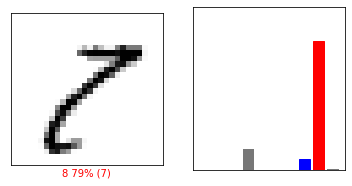

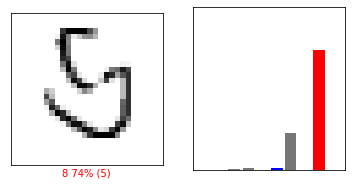

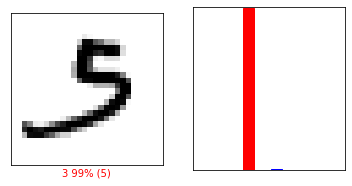

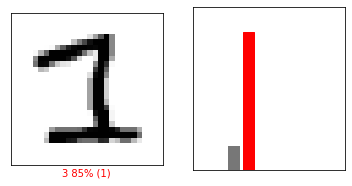

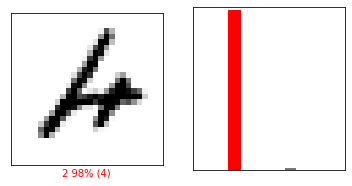

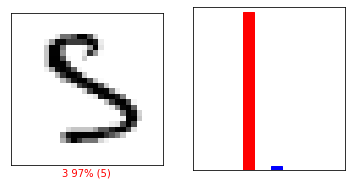

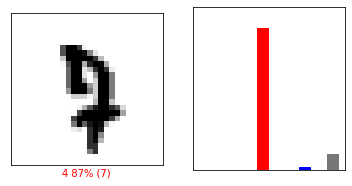

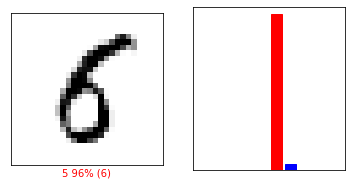

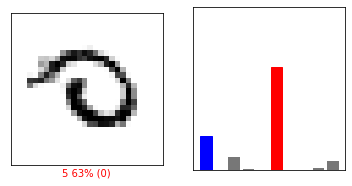

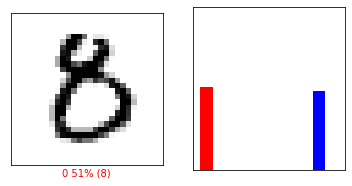

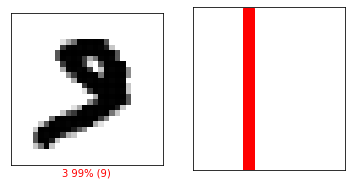

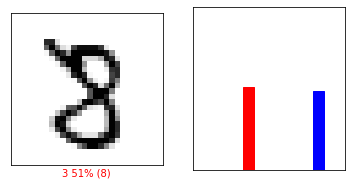

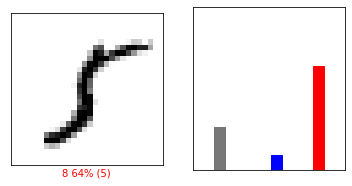

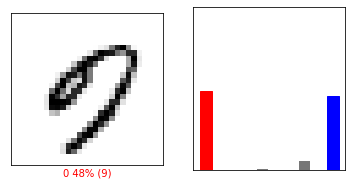

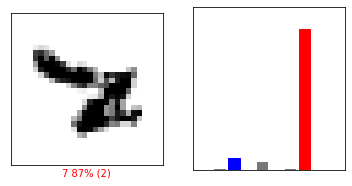

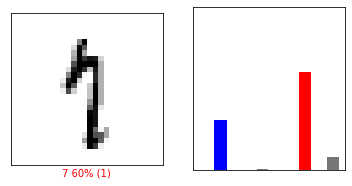

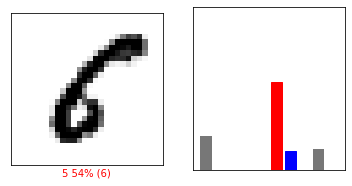

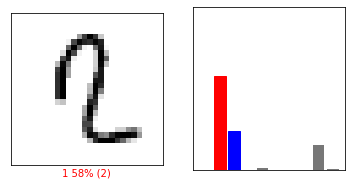

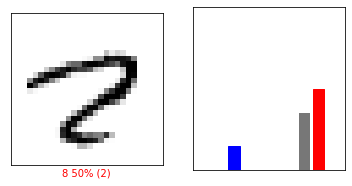

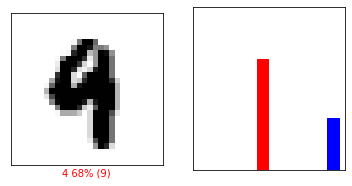

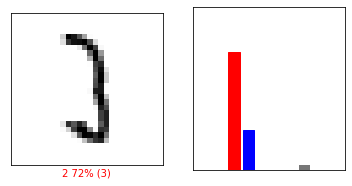

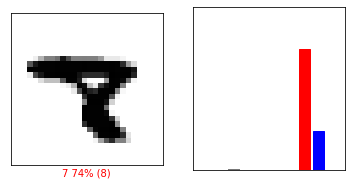

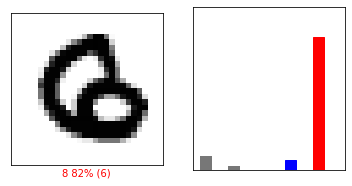

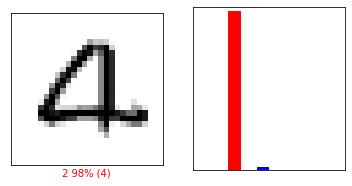

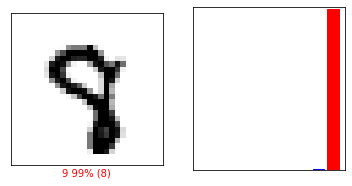

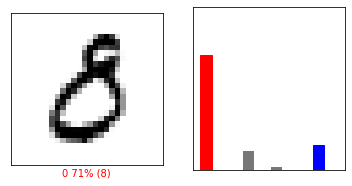

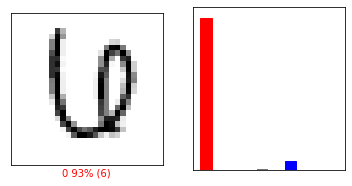

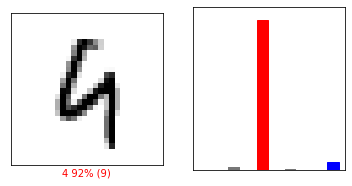

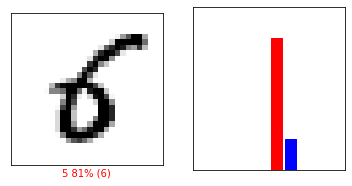

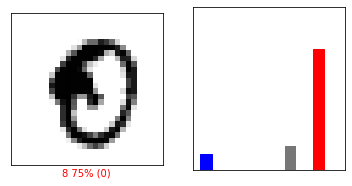

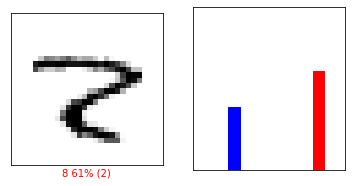

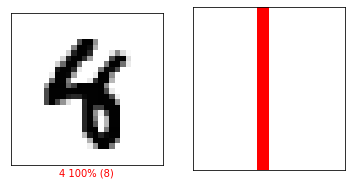

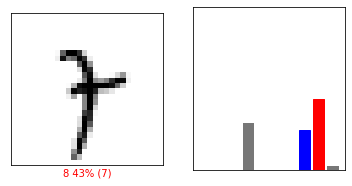

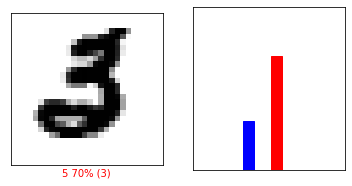

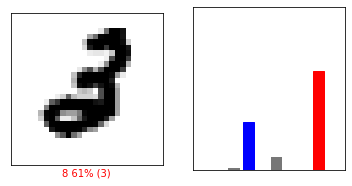

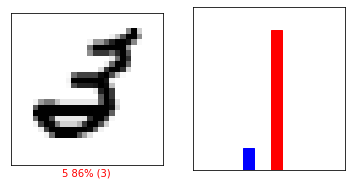

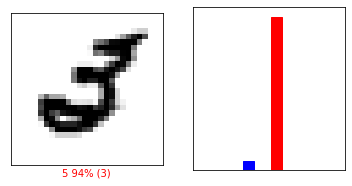

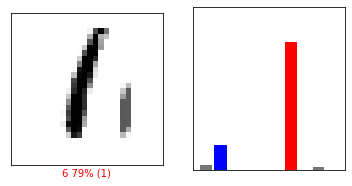

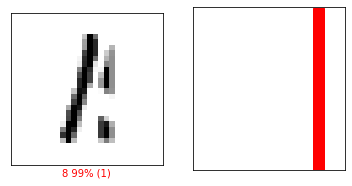

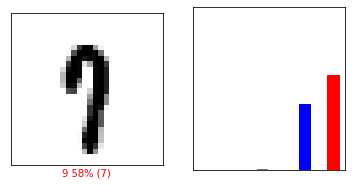

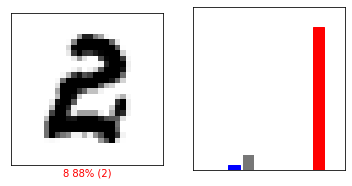

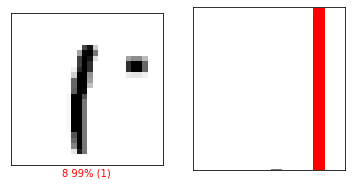

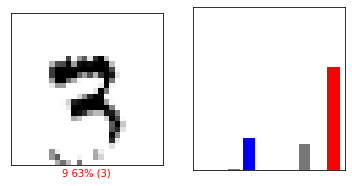

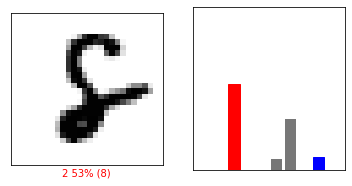

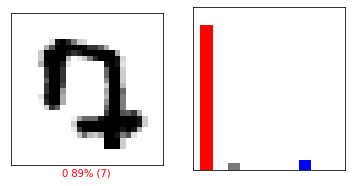

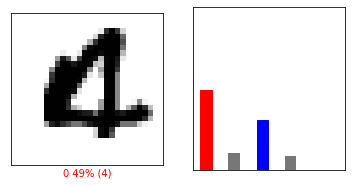

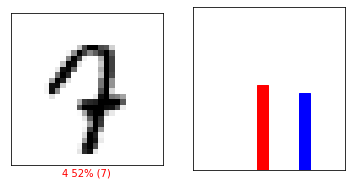

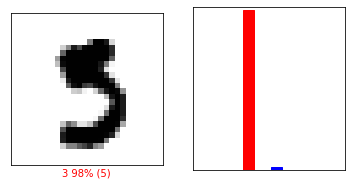

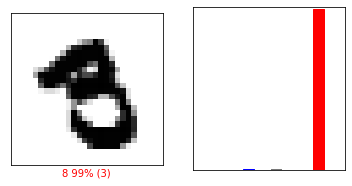

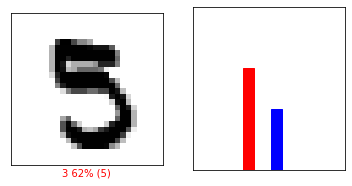

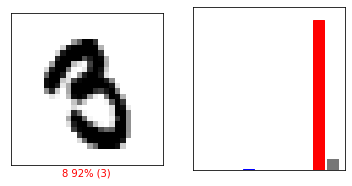

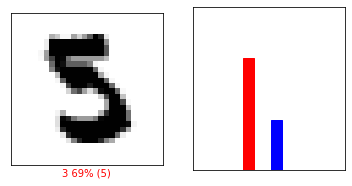

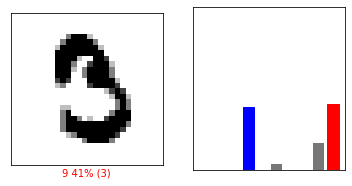

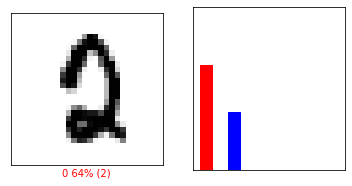

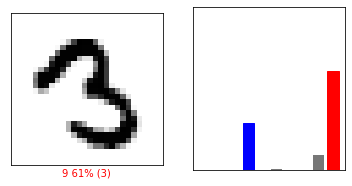

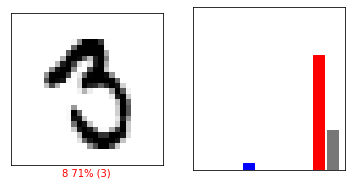

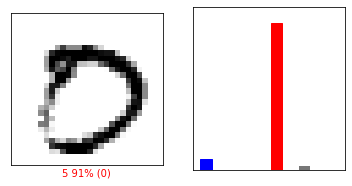

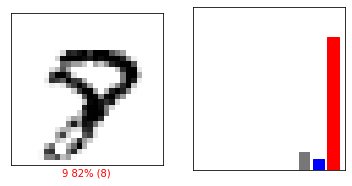

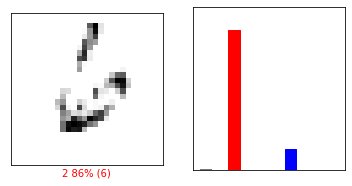

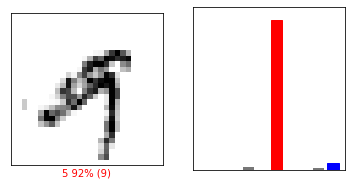

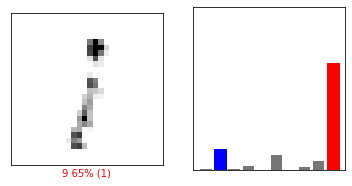

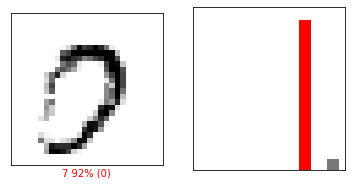

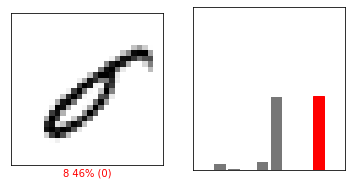

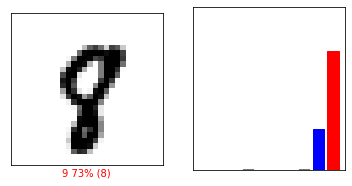

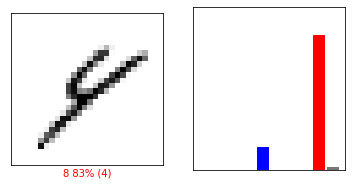

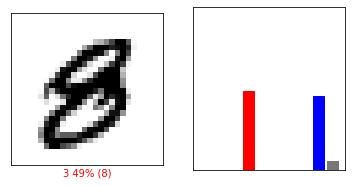

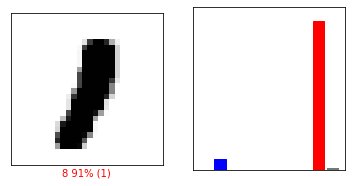

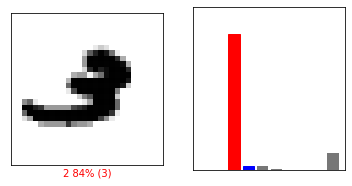

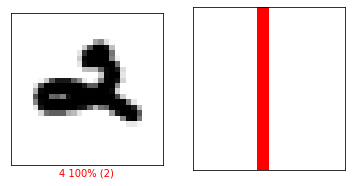

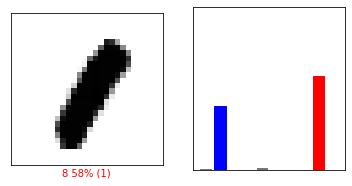

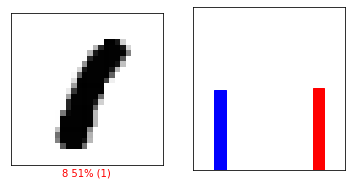

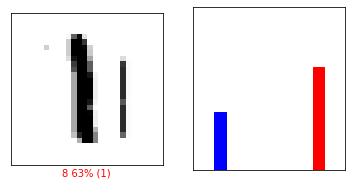

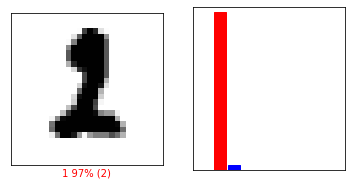

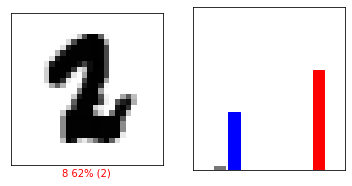

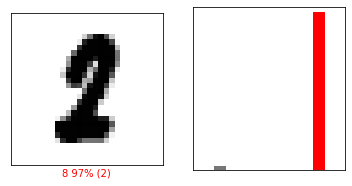

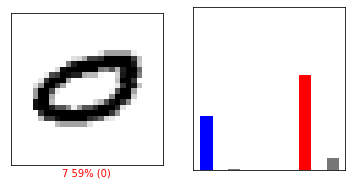

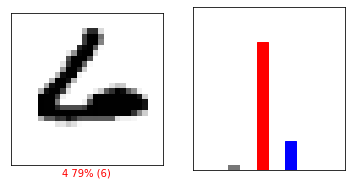

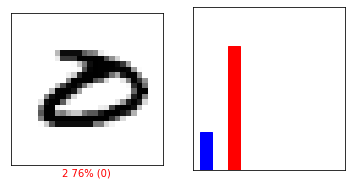

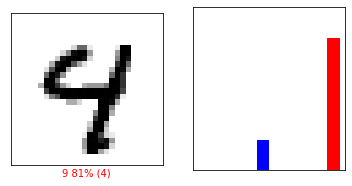

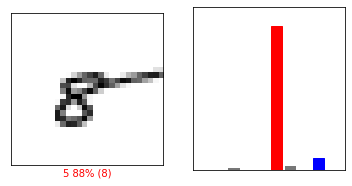

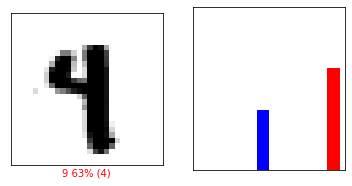

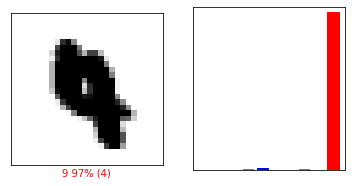

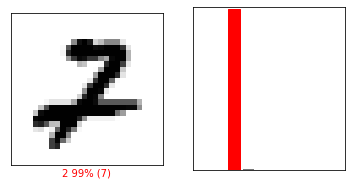

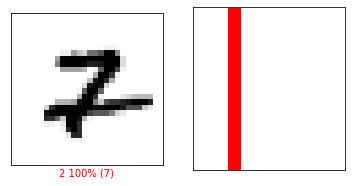

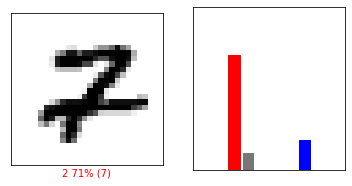

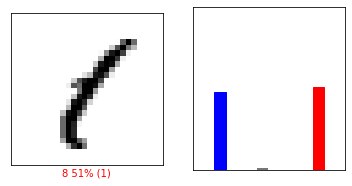

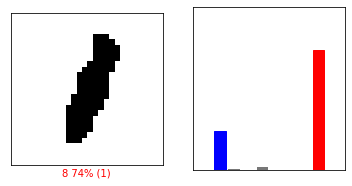

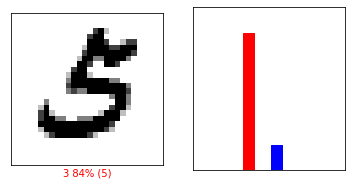

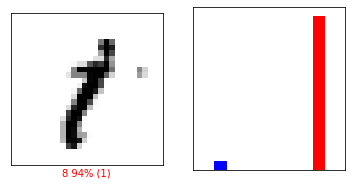

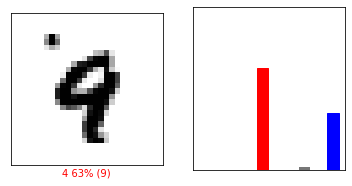

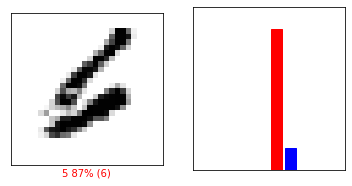

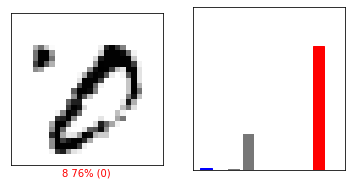

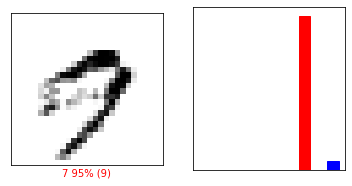

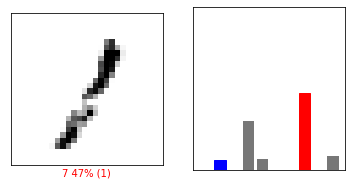

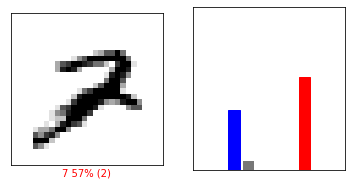

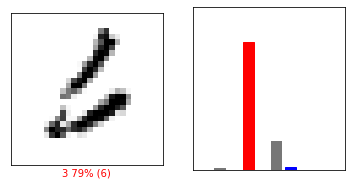

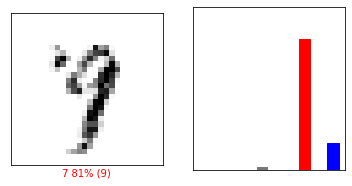

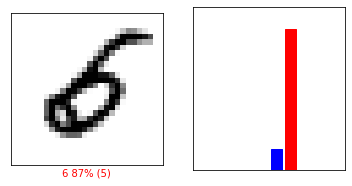

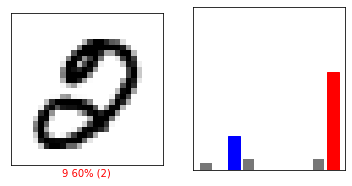

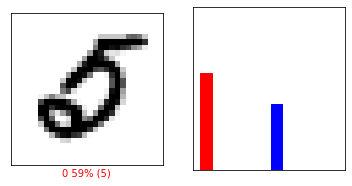

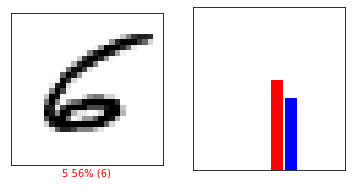

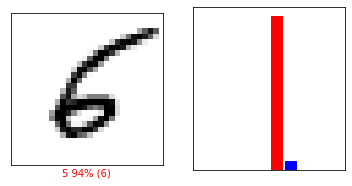

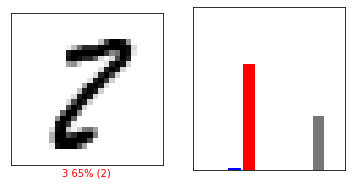

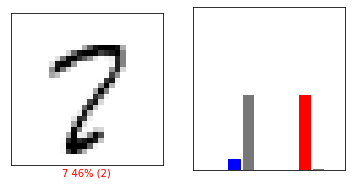

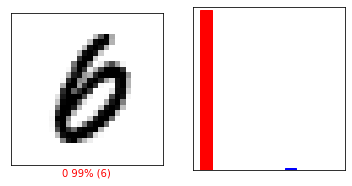

In [79]:
for index in incorrected.index :
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(index,y_pred, y_test, x_test.reshape((x_test.shape[0],28,28)))
    plt.subplot(1,2,2)
    plot_value_array(index, y_pred, y_test)
    plt.show()

## 학습 중 모델 내부 시각화
---
https://subinium.github.io/Keras-5-2/

1. 특정 입력에 대해 CNN의 중간 레이어의 출력 feature을 관찰

In [91]:
from keras import models

# 상위 8개 층의 출력을 추출합니다:
layer_outputs = [layer.output for layer in model.layers[:8]]
#input이 들어왔을 떄, model의 layer output의 활성화를 추출해주는 activation_model 정의
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [122]:
#각 layer의 output을 list에 저장
#activations[0] = 최상위 레이어의 결과값
activations = activation_model.predict(x_test[0:1])

In [123]:
activations[0].shape

(1, 26, 26, 256)

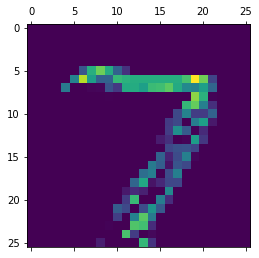

In [124]:
#각 레이어들의 활성화 결과(=activation func을 통과한 결과)를 보여줌
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 253], cmap='viridis')
plt.show()

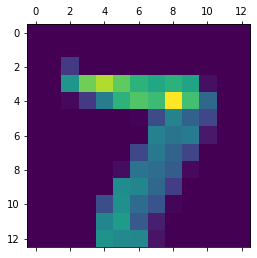

In [125]:
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0, :, :, 20], cmap='viridis')
plt.show()

C:\Users\KMS\Anaconda3\envs\data37\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


MemoryError: Unable to allocate 589. TiB for an array with shape (116985856, 692224) and data type float64

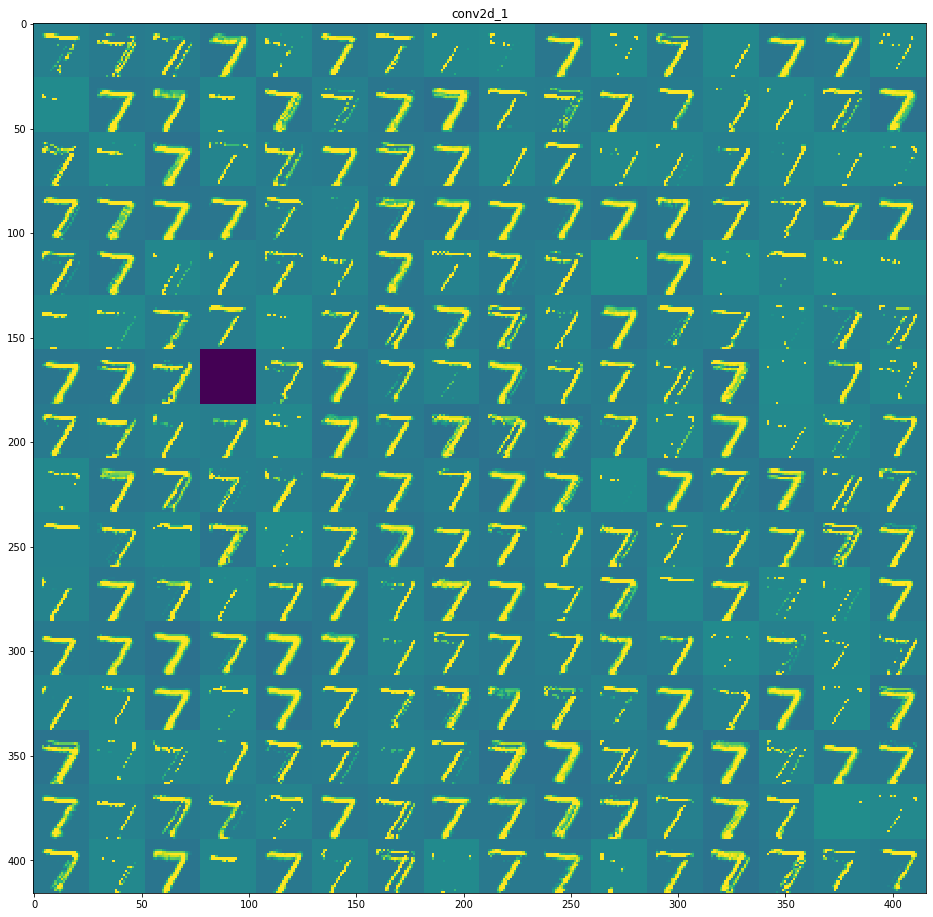

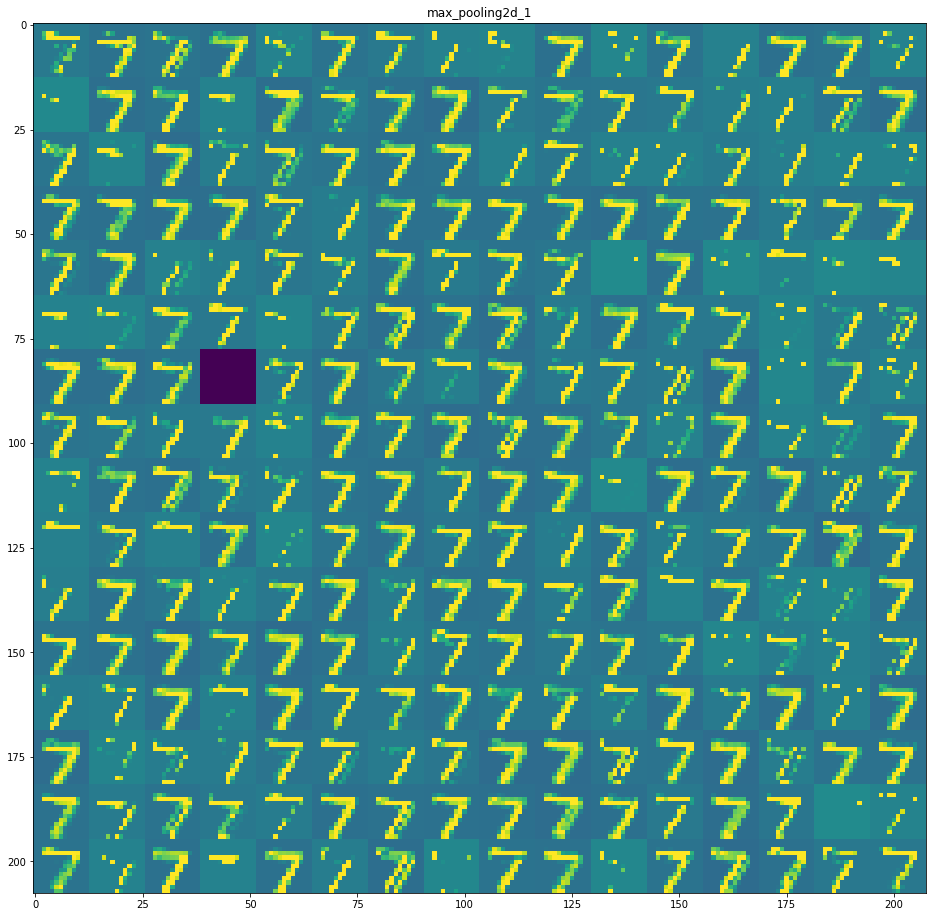

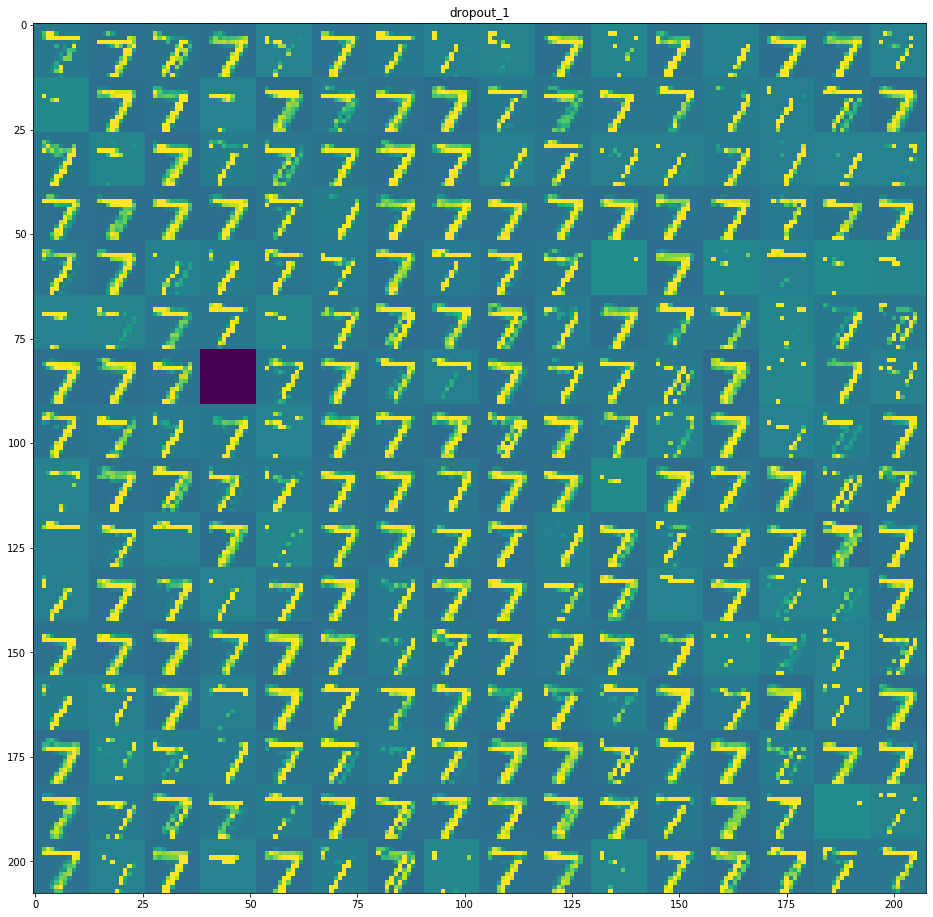

In [126]:
# 코드 5-31 중간층의 모든 활성화에 있는 채널 시각화하기

# 층의 이름을 그래프 제목으로 사용합니다
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그립니다
# FNN의 경우에는 row,col이 너무 커지므로 못 그림
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기는 (1, size, size, n_features)입니다
    size = layer_activation.shape[1]

    # 활성화 채널을 위한 그리드 크기를 구합니다
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

In [ ]:
"""
이 사진에서 다음과 같은 사실을 생각해볼 수 있습니다.
첫 번째 층은 여러 종류의 에지 감지기를 모아 놓은 것 같습니다. 이 단계의 활성화에는 초기 사진에 있는 거의 모든 정보가 유지됩니다.

상위 층으로 갈수록 활성화는 점점 더 추상적으로 되고 시각적으로 이해하기 어려워집니다. ‘고양이 귀’와 ‘고양이 눈’과 같이 고수준의 개념을 인코딩하기 시작합니다.
상위 층의 표현은 이미지의 시각적 콘텐츠에 관한 정보가 점점 줄어들고 이미지의 클래스에 관한 정보가 점점 증가합니다.

비어 있는 활성화가 층이 깊어짐에 따라 늘어납니다. 첫 번째 층에서는 모든 필터가 입력 이미지에 활성화되었지만 층을 올라가면서 활성화되지 않는 필터들이 생깁니다.
필터에 인코딩된 패턴이 입력 이미지에 나타나지 않았다는 것을 의미입니다.

심층 신경망이 학습한 표현에서 일반적으로 나타나는 중요한 특징을 조금 전 확인했습니다.
층에서 추출한 특성은 층의 깊이를 따라 점점 더 추상적이 됩니다. 높은 층의 활성화는 특정 입력에 관한 시각적 정보가 점점 줄어들고 타깃에 관한 정보(이 경우에는 강아지 또는 고양이 이미지의 클래스)가 점점 더 증가합니다.
심층 신경망은 입력되는 원본 데이터(여기서는 RGB 포맷의 사진)에 대한 정보 정제 파이프라인처럼 작동합니다. 반복적인 변환을 통해 관계없는 정보(예를 들어 이미지에 있는 특정 요소)를 걸러내고 유용한 정보는 강조되고 개선됩니다
(여기에서는 이미지의 클래스).
"""

2. CNN의 필터값 구체화 및 시각화

In [135]:
# 코드 5-32 필터 시각화를 위한 손실 텐서 정의하기

from keras.applications import VGG16
from keras import backend as K

layer_name = 'conv2d_1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [137]:
# 코드 5-33 입력에 대한 소실의 그래디언트 구하기

# gradients 함수가 반환하는 텐서 리스트(여기에서는 크기가 1인 리스트)에서 첫 번째 텐서를 추출합니다
grads = K.gradients(loss, model.input)[0]
grads

<tf.Tensor 'gradients_1/conv2d_1/convolution_grad/Conv2DBackpropInput:0' shape=(?, 28, 28, 1) dtype=float32>

In [140]:
# 코드 5-34 그래디언트 정규화하기

# 0 나눗셈을 방지하기 위해 1e–5을 더합니다
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [142]:
# 코드 5-35 입력 값에 대한 넘파이 출력 값 추출하기

iterate = K.function([model.input], [loss, grads])

# 테스트:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 28, 28, 1))])

In [143]:
# 코드 5-36 확률적 경사 상승법을 사용한 손실 최대화하기

# 잡음이 섞인 회색 이미지로 시작합니다
input_img_data = np.random.random((1, 28, 28, 1)) * 20 + 128.

# 업데이트할 그래디언트의 크기
step = 1.
for i in range(40):   # 경사 상승법을 40회 실행합니다
    # 손실과 그래디언트를 계산합니다
    loss_value, grads_value = iterate([input_img_data])
    # 손실을 최대화하는 방향으로 입력 이미지를 수정합니다
    input_img_data += grads_value * step

In [144]:
# 코드 5-37 텐서를 이미지 형태로 변환하기 위한 유틸리티 함수

def deprocess_image(x):
    # 텐서의 평균이 0, 표준 편차가 0.1이 되도록 정규화합니다
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # [0, 1]로 클리핑합니다
    x += 0.5
    x = np.clip(x, 0, 1)

    # RGB 배열로 변환합니다
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [153]:
# 코드 5-37 필터 시각화 이미지를 만드는 함수

def generate_pattern(layer_name, filter_index, size=28):
    # 주어진 층과 필터의 활성화를 최대화하기 위한 손실 함수를 정의합니다
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # 손실에 대한 입력 이미지의 그래디언트를 계산합니다
    grads = K.gradients(loss, model.input)[0]

    # 그래디언트 정규화
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # 입력 이미지에 대한 손실과 그래디언트를 반환합니다
    iterate = K.function([model.input], [loss, grads])

    # 잡음이 섞인 회색 이미지로 시작합니다
    input_img_data = np.random.random((1, size, size, 1)) * 20 + 128.

    # 경사 상승법을 40 단계 실행합니다
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

In [158]:
generate_pattern('conv2d_1', 0).reshape((28,28))

array([[127, 139, 138, 152, 103, 115, 138, 107, 163, 140, 172, 107, 112,
         97, 171, 100, 113,  96, 124, 135, 155, 128,  85, 112,  98, 106,
        107, 152],
       [170,  85, 102, 130, 147, 121, 140, 122,  93,  97, 118,  92, 122,
        141, 151,  90, 128, 116, 137, 130, 140, 159, 166, 127, 138, 141,
        168, 132],
       [136, 105, 125, 102, 160, 133, 116, 157, 131, 159, 142, 149, 125,
        107, 144,  86, 108,  95, 103,  91, 152, 114,  95,  94, 113, 115,
         97, 141],
       [147, 163, 121, 142, 120,  94, 162,  93, 163,  94, 163, 133, 115,
        151, 120, 152, 148, 104, 128, 125, 159, 105, 119, 121, 146, 117,
         84, 103],
       [137, 111, 163, 172, 142, 132,  92, 150, 129, 146, 123, 155, 134,
        137,  99, 155,  94,  97,  92, 122, 172, 104, 153, 142, 129, 165,
        142,  92],
       [ 85, 106, 116, 105,  94,  91, 146,  93, 102, 152,  96, 157, 119,
        130, 132, 108, 109,  88,  96, 158, 101, 113, 100, 144, 136, 132,
        148, 115],
       [16

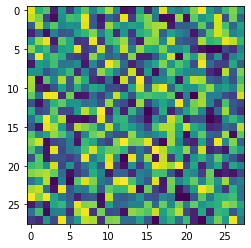

In [159]:
#첫번째 층의 첫번째 unit이 반응하는 패턴
plt.imshow(generate_pattern('conv2d_1', 0).reshape((28,28)))
plt.show()

In [163]:
for layer in model.layers :
    print(layer.name)

conv2d_1
max_pooling2d_1
dropout_1
flatten_1
dense_1
dense_2


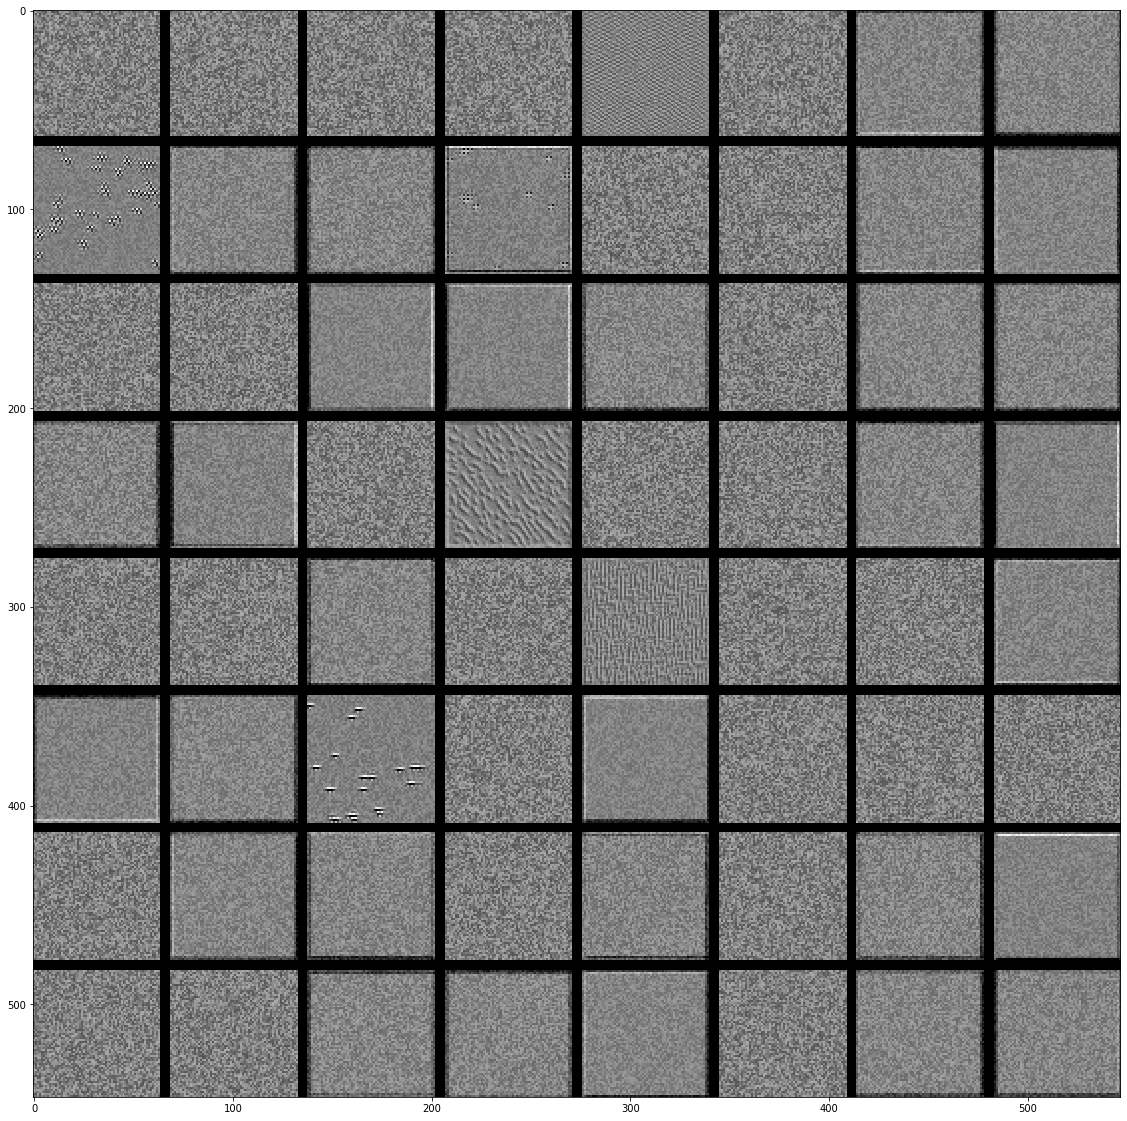

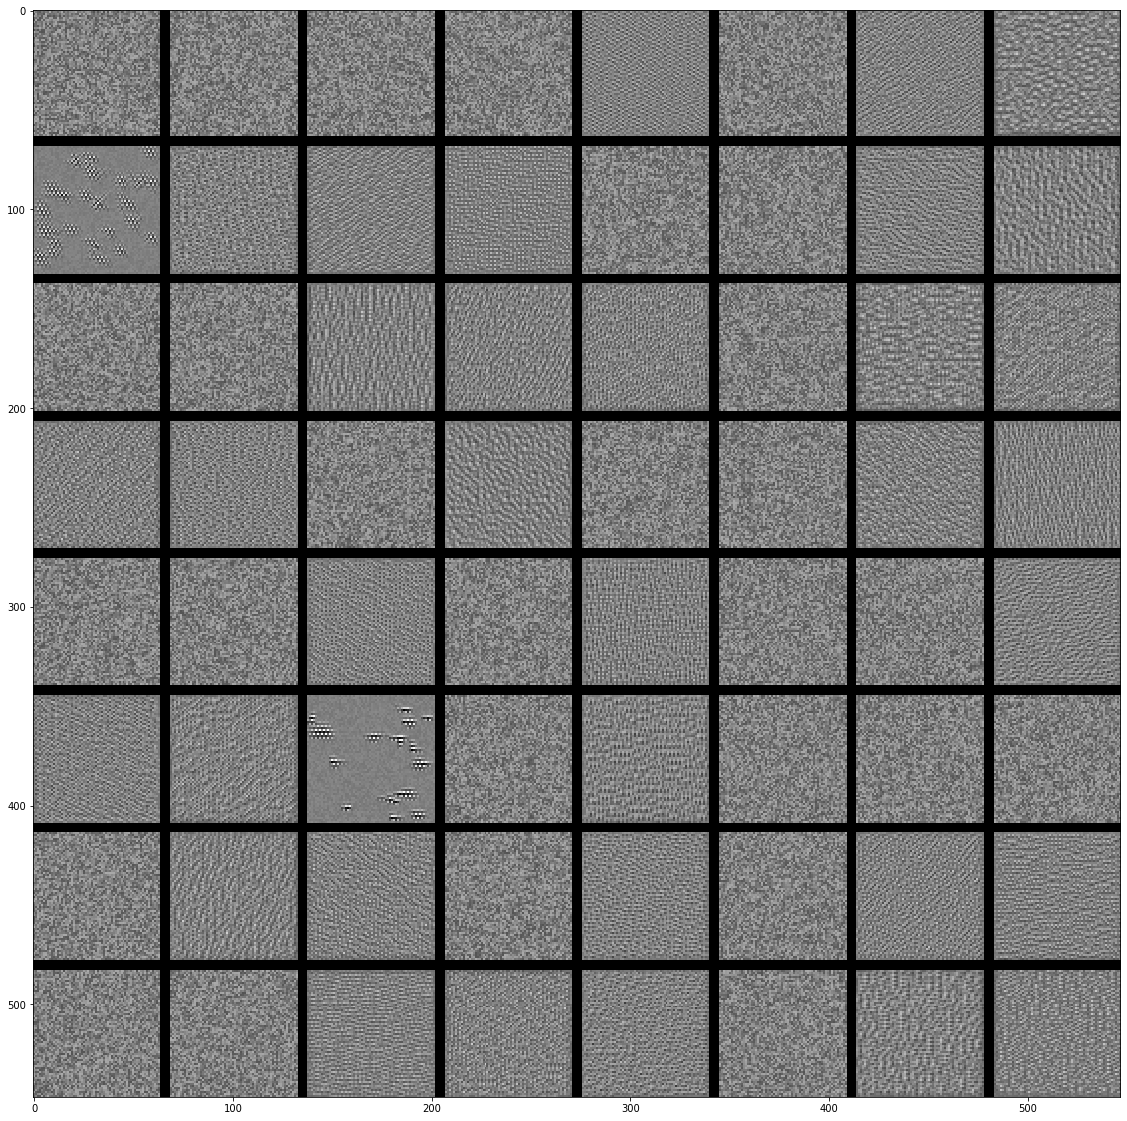

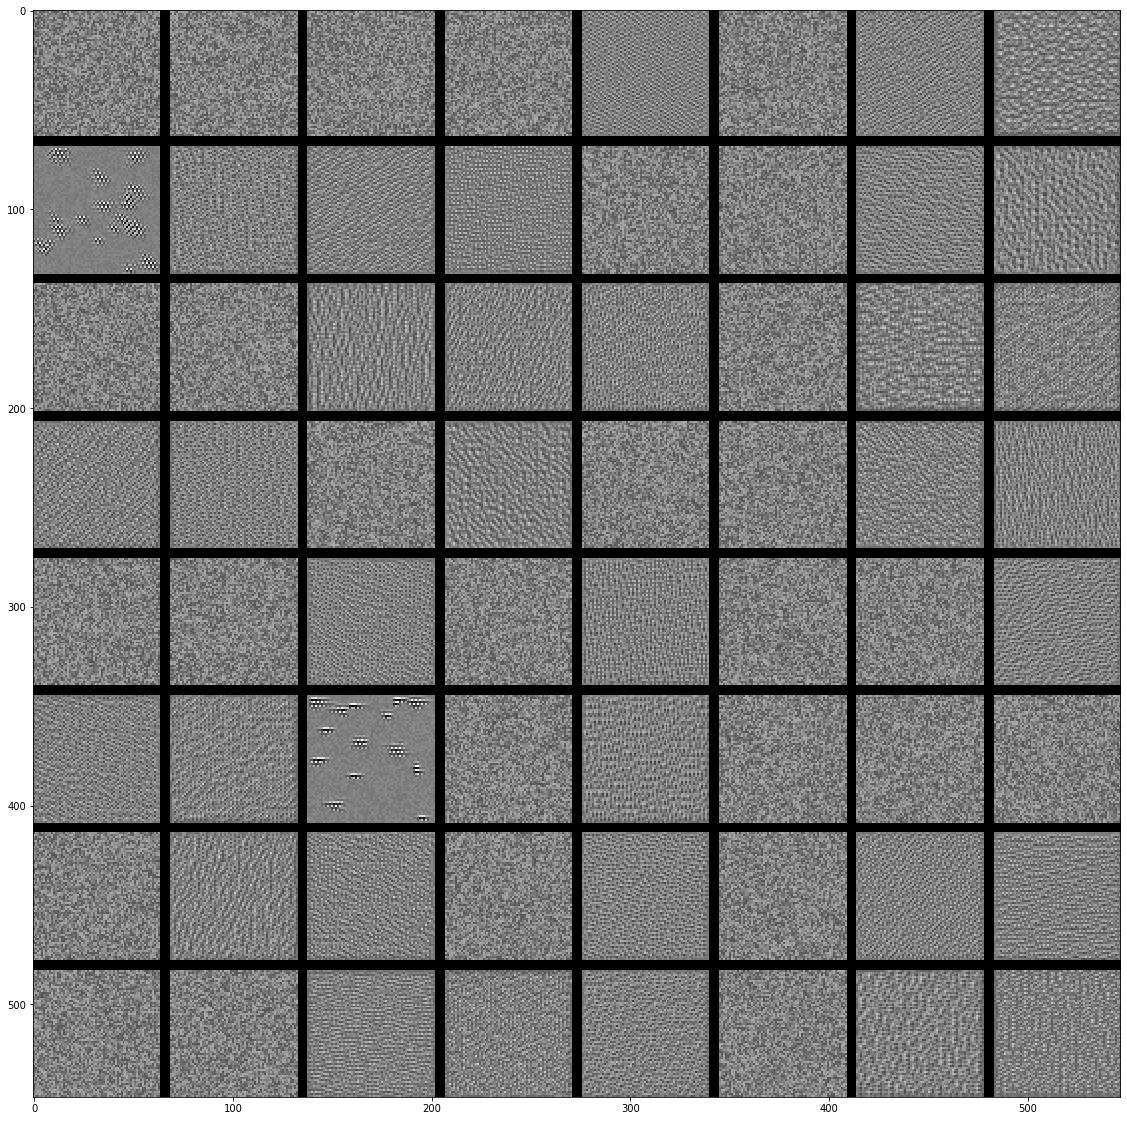

ValueError: Index out of range using input dim 2; input has only 2 dims for 'strided_slice_204' (op: 'StridedSlice') with input shapes: [?,?], [4], [4], [4] and with computed input tensors: input[3] = <1 1 1 1>.

In [164]:
for layer_name in ['conv2d_1','max_pooling2d_1','dropout_1','flatten_1','dense_1','dense_2']:
    size = 64
    margin = 5

    # 결과를 담을 빈 (검은) 이미지
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

    for i in range(8):  # results 그리드의 행을 반복합니다
        for j in range(8):  # results 그리드의 열을 반복합니다
            # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴 생성합니다
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # results 그리드의 (i, j) 번째 위치에 저장합니다
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # results 그리드를 그립니다
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

In [ ]:
"""
이런 필터 시각화를 통해 컨브넷 층이 바라보는 방식을 이해할 수 있습니다. 이 컨브넷 필터들은 모델의 상위 층으로 갈수록 점점 더 복잡해지고 개선됩니다.
모델에 있는 첫 번째 층의 필터는 간단한 대각선 방향의 에지와 색깔을 인코딩합니다.
에지나 색깔의 조합으로 만들어진 간단한 질감을 인코딩합니다.
더 상위 층 필터는 자연적인 이미지에서 찾을 수 있는 질감을 닮아 가기 시작합니다.
"""

3. 클래스 활성화 히트맵(CAM) 시각화

입력 이미지가 각 채널을 활성화하는 정도에 따라, 클래스에 대한 각 채널의 중요도를 계산하여 히트맵을 표기한 것

In [195]:
# 코드 5-42 Grad-CAM 알고리즘 설명하기

idx_ele = np.argmax(y_pred[0])

# 예측 벡터의 '아프리카 코끼리' 항목
african_elephant_output = model.output[:, idx_ele]

# VGG16의 마지막 합성곱 층인 block5_conv3 층의 특성 맵
last_conv_layer = model.get_layer('conv2d_1')

# block5_conv3의 특성 맵 출력에 대한 '아프리카 코끼리' 클래스의 그래디언트
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# 특성 맵 채널별 그래디언트 평균 값이 담긴 (512,) 크기의 벡터
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# 샘플 이미지가 주어졌을 때 방금 전 정의한 pooled_grads와 block5_conv3의 특성 맵 출력을 구합니다
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 두 마리 코끼리가 있는 샘플 이미지를 주입하고 두 개의 넘파이 배열을 얻습니다
pooled_grads_value, conv_layer_output_value = iterate(x_test[0:1])

# "아프리카 코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다
for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵입니다
heatmap = np.mean(conv_layer_output_value, axis=-1)

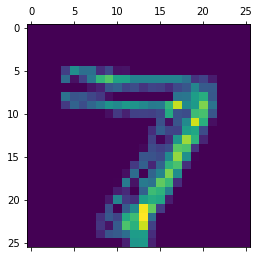

In [200]:
# 코드 5-43 히트맵 후처리하기
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [205]:
# 코드 5-44 원본 이미지에 히트맵 덧붙이기

import cv2


# cv2 모듈을 사용해 원본 이미지를 로드합니다
#img = cv2.imread(img_path)
img = x_test[0]
# heatmap을 원본 이미지 크기에 맞게 변경합니다
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# heatmap을 RGB 포맷으로 변환합니다
heatmap = np.uint8(255 * heatmap)

# 히트맵으로 변환합니다
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4는 히트맵의 강도입니다
superimposed_img = heatmap * 0.4 + img

# 디스크에 이미지를 저장합니다
cv2.imwrite('./datasets/elephant_cam.jpg', superimposed_img)

True

In [206]:
from IPython.display import Image
Image('./datasets/elephant_cam.jpg')

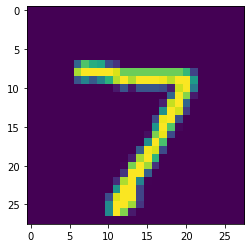

In [209]:
plt.imshow(x_test[0].reshape((28,28)))

In [ ]:
"""
이 시각화 기법은 2개의 중요한 질문에 답을 줍니다.
왜 네트워크가 이미지에 아프리카 코끼리가 있다고 생각하는가?
아프리카 코끼리가 사진 어디에 있는가?
"""